In [1]:
from qonnx.core.modelwrapper import ModelWrapper
from functools import partial
from finn.analysis.fpgadataflow.exp_cycles_per_layer import exp_cycles_per_layer
from finn.analysis.fpgadataflow.res_estimation import res_estimation

import matplotlib.pyplot as plt

In [2]:
from finn.util.basic import pynq_part_map
# change this if you have a different PYNQ board, see list above
pynq_board = "Pynq-Z1"
fpga_part = pynq_part_map[pynq_board]
target_clk_ns = 10

In [6]:
# experiment_folder = './experiments/043_pynq-z1__workspace__AIMET_NoPadding__w4W2a4__full_build'

experiment_folder = ('./experiments_pynq-z1'  
                    + '/304_pynq-z1__500FPS__workspace__AIMET_Balanced__BIPOLAR__w4W2a4__full_build' 
                    + '/output_full_build')

model_folder = experiment_folder + '/intermediate_models'
model_bitfile = model_folder + '/step_synthesize_bitfile.onnx'

In [7]:
model = ModelWrapper(model_bitfile)

In [8]:
from finn.analysis.fpgadataflow.post_synth_res import post_synth_res

In [9]:
post_synth_dict = post_synth_res(model)

In [26]:
# post_synth_dict

In [11]:
dp_1 = {k.split("StreamingDataflowPartition_1_")[-1]: v for k, v in post_synth_dict.items() if "StreamingDataflowPartition_1" in k}

In [27]:
# dp_1

In [13]:
def fields_dict(post_synth_dict):
    fields = []
    for k in post_synth_dict.keys():
        for field in post_synth_dict[k].keys():
            fields.append(field)
        break
    res_dict = {k: dict() for k in fields}
    for layer in post_synth_dict.keys():
        for field in res_dict.keys():
            res_dict[field].update({layer: post_synth_dict[layer][field]})

    # Accumulated resources used, to compare with FPGA limit
    res_dict_added = {k: dict() for k in fields}
    for field in res_dict.keys():
        acc = 0
        for layer, value in res_dict[field].items():
            acc += value
            res_dict_added[field].update({layer: acc})   

    return res_dict, res_dict_added

In [14]:
res_dict, res_dict_added = fields_dict(dp_1)

In [28]:
# res_dict_added

# LUTs used

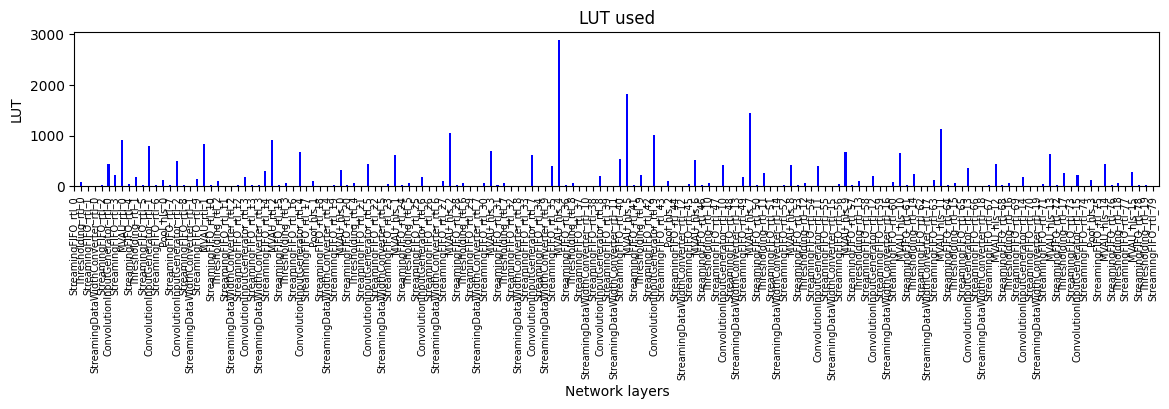

In [16]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict["LUT"].keys(), res_dict["LUT"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict["LUT"].keys())])
plt.ylabel("LUT")
plt.title("LUT used")
plt.show()

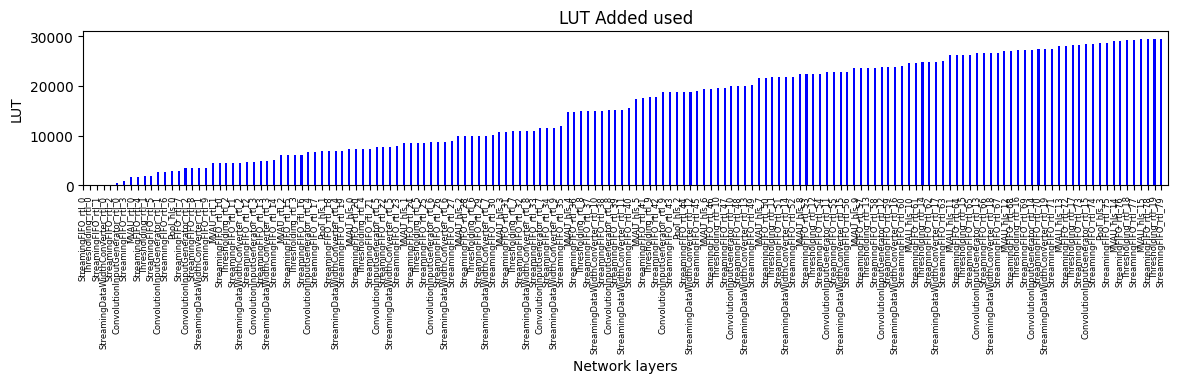

In [30]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict_added["LUT"].keys(), res_dict_added["LUT"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=6, rotation=90)
plt.xlim([0, len(res_dict_added["LUT"].keys())])
plt.ylabel("LUT")
plt.title("LUT Added used")
plt.show()

# FF used

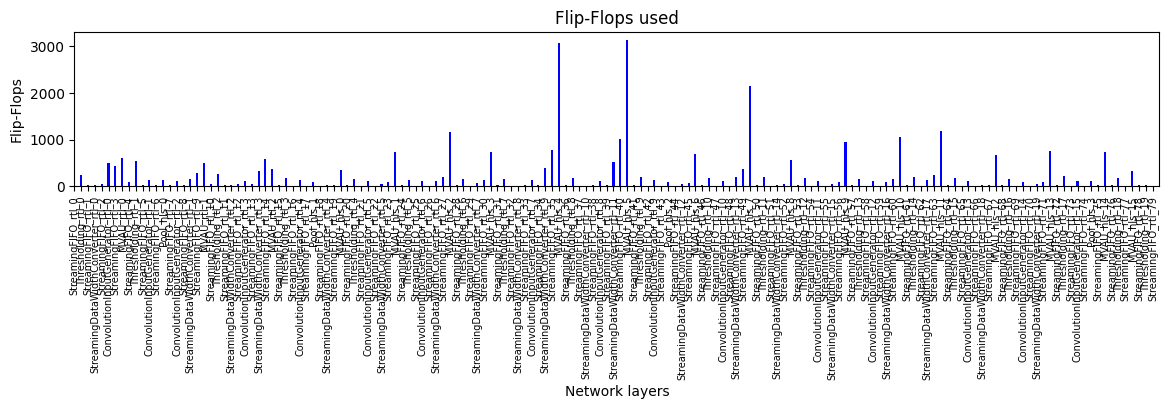

In [18]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict["FF"].keys(), res_dict["FF"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict["FF"].keys())])
plt.ylabel("Flip-Flops")
plt.title("Flip-Flops used")
plt.show()

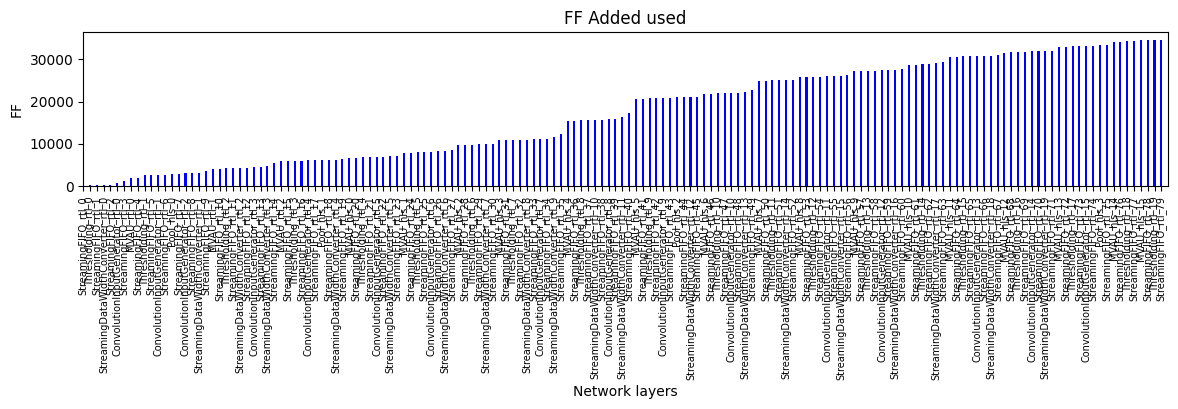

In [19]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict_added["FF"].keys(), res_dict_added["FF"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict_added["FF"].keys())])
plt.ylabel("FF")
plt.title("FF Added used")
plt.show()

# BRAM 18

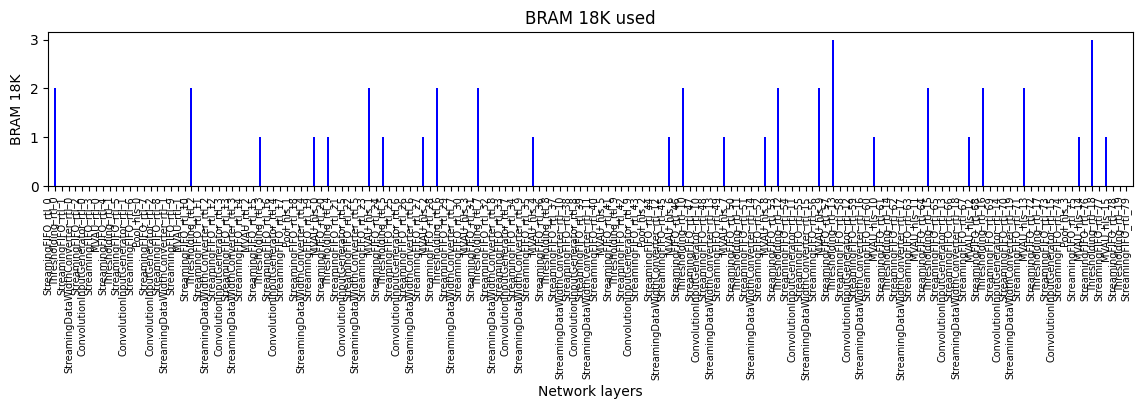

In [20]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict["BRAM_18K"].keys(), res_dict["BRAM_18K"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict["BRAM_18K"].keys())])
plt.ylabel("BRAM 18K")
plt.title("BRAM 18K used")
plt.show()

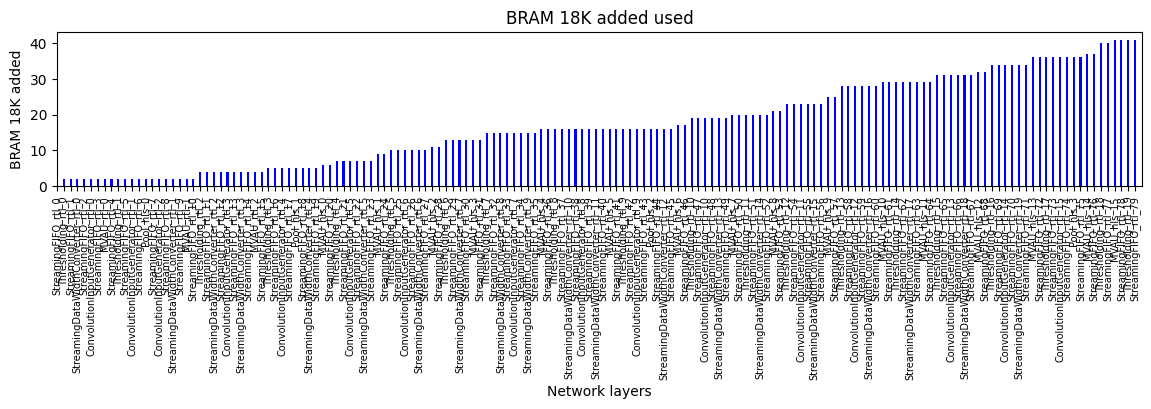

In [21]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict_added["BRAM_18K"].keys(), res_dict_added["BRAM_18K"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict_added["BRAM_18K"].keys())])
plt.ylabel("BRAM 18K added")
plt.title("BRAM 18K added used")
plt.show()

# BRAM 36

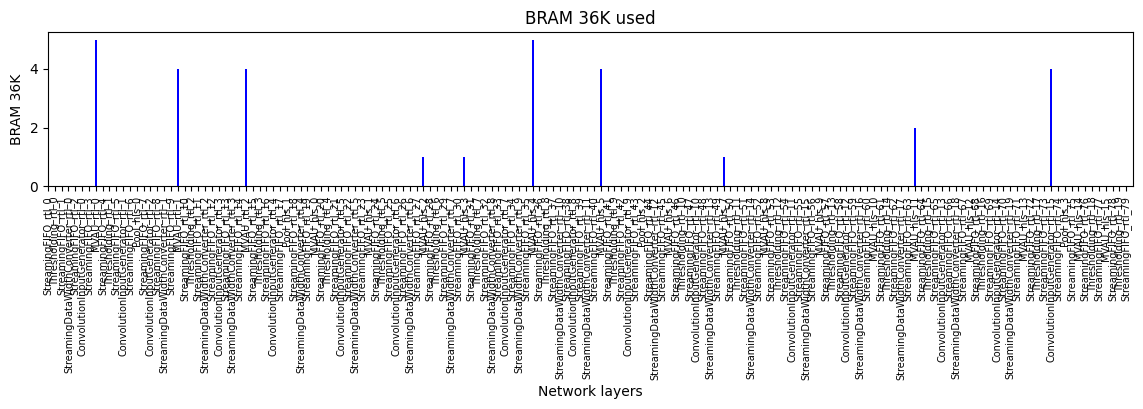

In [22]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict["BRAM_36K"].keys(), res_dict["BRAM_36K"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict["BRAM_36K"].keys())])
plt.ylabel("BRAM 36K")
plt.title("BRAM 36K used")
plt.show()

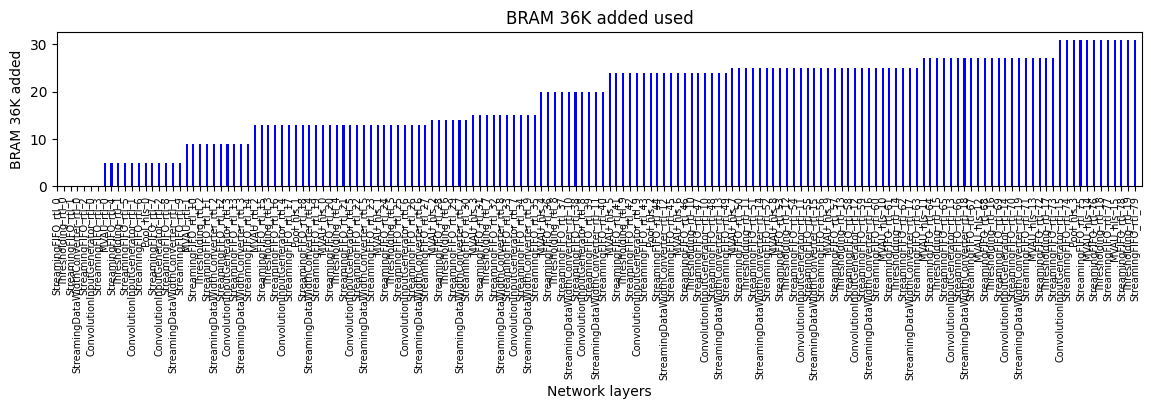

In [23]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict_added["BRAM_36K"].keys(), res_dict_added["BRAM_36K"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict_added["BRAM_36K"].keys())])
plt.ylabel("BRAM 36K added")
plt.title("BRAM 36K added used")
plt.show()

# DSP

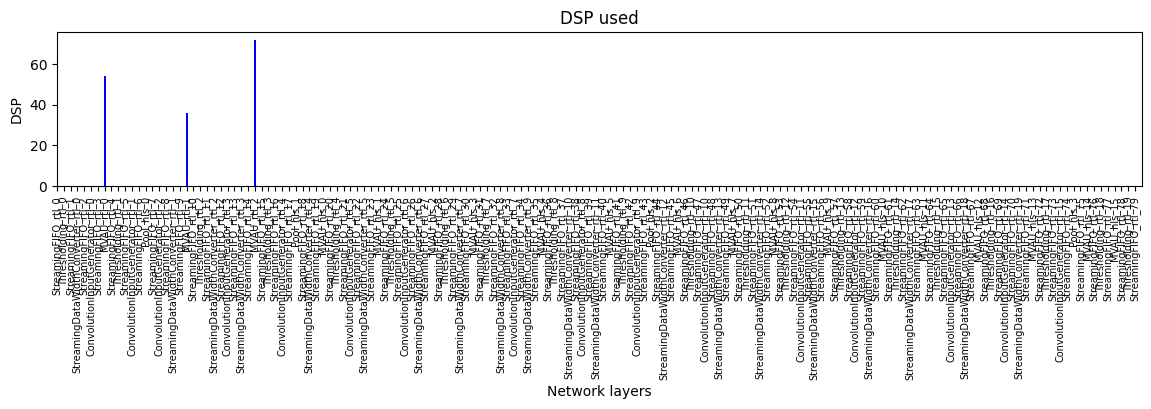

In [24]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict["DSP"].keys(), res_dict["DSP"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict["DSP"].keys())])
plt.ylabel("DSP")
plt.title("DSP used")
plt.show()

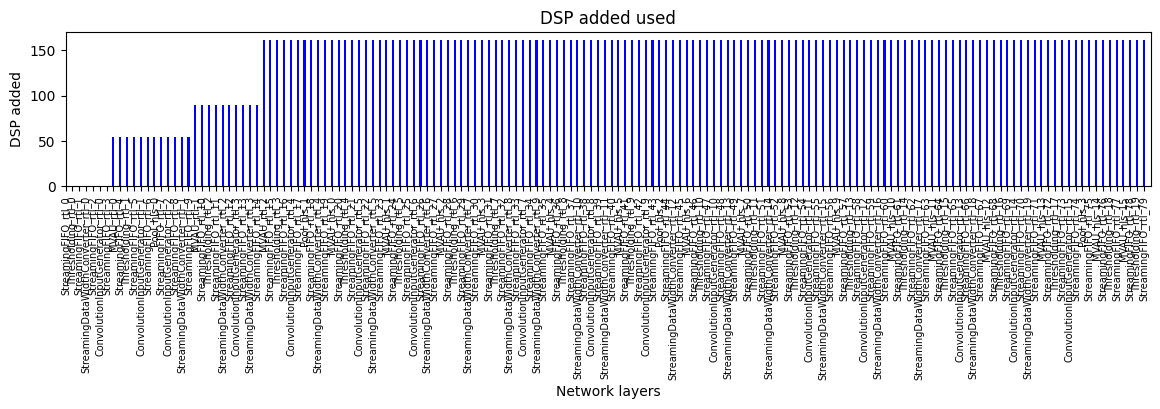

In [25]:
fig = plt.figure(figsize = (14, 2))
plt.bar(res_dict_added["DSP"].keys(), res_dict_added["DSP"].values(), color ='blue', width = 0.3)
plt.xlabel("Network layers")
plt.xticks(fontsize=7, rotation=90)
plt.xlim([0, len(res_dict_added["DSP"].keys())])
plt.ylabel("DSP added")
plt.title("DSP added used")
plt.show()